In [1]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
from bioinfokit.analys import stat


In [3]:
df=pd.read_csv('Diet.csv')
df

,gender,Age,Height,preweight,Diet,weight6weeks
0,Female,22,159,58,1,54.2
1,Female,46,192,60,1,54.0
2,Female,55,170,64,1,63.3
3,Female,33,171,64,1,61.1
4,Female,50,170,65,1,62.2
...,...,...,...,...,...,...
71,Male,35,183,83,3,80.2
72,Male,49,177,84,3,79.9
73,Male,28,164,85,3,79.7
74,Male,40,167,87,3,77.8


In [4]:
df.shape

(76, 6)

In [5]:
#2 way  ANOVA=> dIET +geNDER

In [6]:
df['wtloss']=df.preweight-df.weight6weeks
df

,gender,Age,Height,preweight,Diet,weight6weeks,wtloss
0,Female,22,159,58,1,54.2,3.8
1,Female,46,192,60,1,54.0,6.0
2,Female,55,170,64,1,63.3,0.7
3,Female,33,171,64,1,61.1,2.9
4,Female,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
71,Male,35,183,83,3,80.2,2.8
72,Male,49,177,84,3,79.9,4.1
73,Male,28,164,85,3,79.7,5.3
74,Male,40,167,87,3,77.8,9.2


<Axes: xlabel='gender', ylabel='wtloss'>

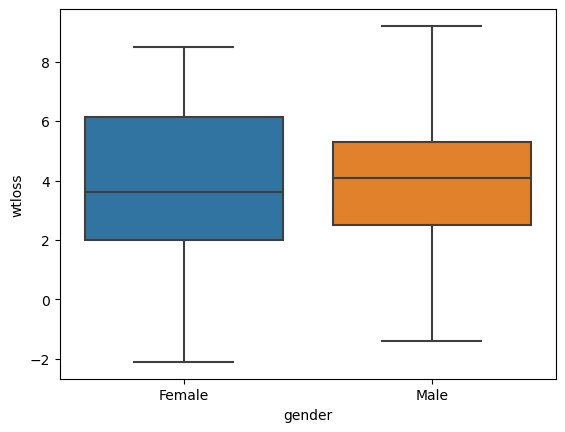

In [7]:
sns.boxplot(x=df.gender, y=df.wtloss)

<Axes: xlabel='Diet', ylabel='wtloss'>

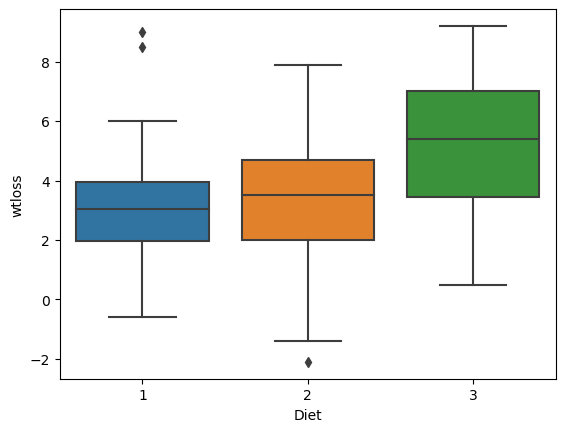

In [8]:
sns.boxplot(x=df.Diet, y=df.wtloss)

<Axes: xlabel='Diet', ylabel='wtloss'>

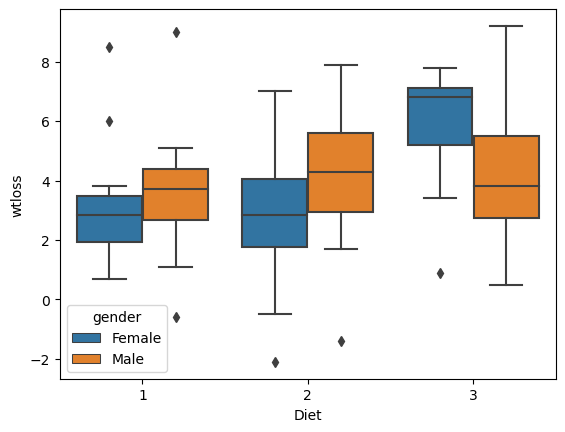

In [9]:
sns.boxplot(x=df.Diet, y=df.wtloss, hue=df.gender)

<Axes: xlabel='Diet', ylabel='wtloss'>

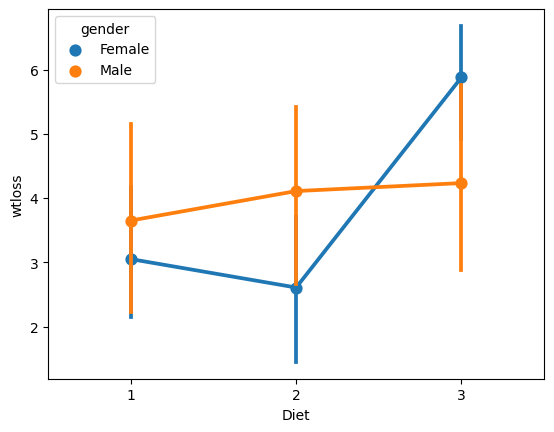

In [10]:
sns.pointplot(y= 'wtloss', x='Diet', hue='gender',data=df)

C:\Users\Sidd-pc\AppData\Local\Temp\ipykernel_7300\1020161736.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.pointplot(y= 'wtloss', x='Diet', hue='gender',data=df, ci=0)


<Axes: xlabel='Diet', ylabel='wtloss'>

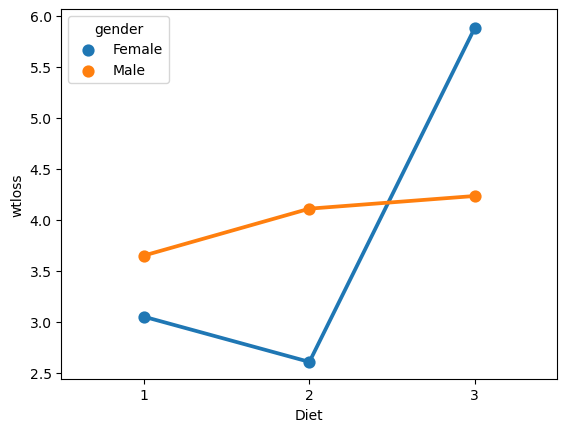

In [11]:
sns.pointplot(y= 'wtloss', x='Diet', hue='gender',data=df, ci=0)

In [12]:
#ANOVA-ONE WAY,GENDER

In [13]:
formula='wtloss~C(gender)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
C(gender)   1.0    0.278485  0.278485  0.043786  0.834827
Residual   74.0  470.650331  6.360140       NaN       NaN


In [14]:
# do nt reject Null Hypothesis
#gender does not have effect on weight loss

In [15]:
#one way, diet

In [16]:
formula='wtloss~C(Diet)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

            df      sum_sq    mean_sq         F    PR(>F)
C(Diet)    2.0   60.527008  30.263504  5.383104  0.006596
Residual  73.0  410.401807   5.621943       NaN       NaN


In [17]:
#reject Null hypothesis
#Diet has an effect on the weight loss


In [18]:
#ANOVA 2 WAY :DIET+GENDER

In [19]:
formula='wtloss~C(Diet)+C(gender)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

             df      sum_sq    mean_sq         F    PR(>F)
C(Diet)     2.0   60.527008  30.263504  5.311547  0.007052
C(gender)   1.0    0.168696   0.168696  0.029608  0.863866
Residual   72.0  410.233112   5.697682       NaN       NaN


In [20]:
#Diet has an effect but not gender
#However , the group means are different

#Reject null Hypothesies

In [21]:
#which group means are significantly different?
#Tukey honest significant difference=Tukey Hsd

In [22]:
res=stat()

In [23]:
res.tukey_hsd(df,res_var='wtloss',
              xfac_var=['gender', 'Diet'],
              anova_model='wtloss~C(Diet)+C(gender)')
res.tukey_summary

C:\Users\Sidd-pc\anaconda3\Lib\site-packages\bioinfokit\analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
C:\Users\Sidd-pc\anaconda3\Lib\site-packages\bioinfokit\analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
C:\Users\Sidd-pc\anaconda3\Lib\site-packages\bioinfokit\analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Female, 1)","(Female, 2)",0.442857,-2.198556,3.084270,0.694190,0.900000
1,"(Female, 1)","(Female, 3)",2.830000,0.232983,5.427017,4.511936,0.024717
2,"(Female, 1)","(Male, 1)",0.600000,-2.293523,3.493523,0.858570,0.900000
3,"(Female, 1)","(Male, 2)",1.059091,-1.756665,3.874847,1.557362,0.870746
4,"(Female, 1)","(Male, 3)",1.183333,-1.565937,3.932604,1.782136,0.780674
5,"(Female, 2)","(Female, 3)",3.272857,0.675840,5.869874,5.217994,0.005583
6,"(Female, 2)","(Male, 1)",1.042857,-1.850666,3.936380,1.492276,0.896827
7,"(Female, 2)","(Male, 2)",1.501948,-1.313808,4.317704,2.208570,0.609790
8,"(Female, 2)","(Male, 3)",1.626190,-1.123080,4.375461,2.449093,0.513402
9,"(Female, 3)","(Male, 1)",2.230000,-0.623052,5.083052,3.236282,0.212300


In [24]:
df_res=res.tukey_summary

In [25]:
df_res[df_res['p-value']<0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
1,"(Female, 1)","(Female, 3)",2.830000,0.232983,5.427017,4.511936,0.024717
5,"(Female, 2)","(Female, 3)",3.272857,0.675840,5.869874,5.217994,0.005583


In [26]:
#only diet plan 3 is having a significant interaction effect with the gender in weight loss

In [27]:
#The End

In [28]:
61/4

15.25